In [1]:
import cv2 # For capturing Videos

import math # For helping with Image Sequencing

import matplotlib.pyplot as plt # I dont think I need this anymore
%matplotlib inline

import pandas as pd # For creating my training map

from keras.preprocessing import image # For preprocessing Images

import numpy as np # For converting my images into arrays to be fed into my model

from skimage.transform import resize # For resizing Images

from skimage.io import imread # To read the image

from skimage.io import imshow # to show the image

import os # To scroll through directory of classes

from keras.applications.vgg16 import preprocess_input # For preprocessing pixels for VGG16 to take in

from sklearn.model_selection import train_test_split # For doing some training on the model by splitting the data.

from keras.models import Sequential # The model which builds off of itself 

from keras.applications.vgg16 import VGG16 # The imagenet base model

from keras.layers import Dense, InputLayer, Dropout # Adding layers to the model

from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight # helps with weights with little pictures

In [ ]:
# Only use this when splicing a video file (Image Sequencing)
def image_sequencing(video_file, folder_location):
    """ 
    Function which splices the video file into images
    Inputs: video_file : location of video file
            folder_location: Where the images are placed
    Output: Spliced Images in folder location as directed
    """
    count = 0
    cap = cv2.VideoCapture(video_file)
    frame_rate = cap.get(5)
    x = 1
    while(cap.isOpened()):
        frame_id = cap.get(1)
        ret, frame = cap.read()
        if(ret != True):
            break
        if(frame_id % math.floor(frame_rate) == 0):
            filename = f"{folder_location}/{folder_location}_%d_frame.jpg" % count; count = count + 1
            cv2.imwrite(filename, frame)
    cap.release()
    print("Done")

In [ ]:
image_sequencing(video_file='batch_44/Training_Video_44.mp4',
                 folder_location='batch_44')

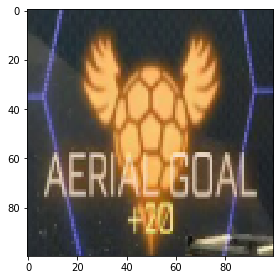

In [2]:
# To see an example:
img =imread('Train/Aerial Goals/batch_01_frame188.jpg')
# Resize and Crop the Image
test_1 = resize(img, output_shape=(700,700))
imshow(test_1[80:180, 300:400])

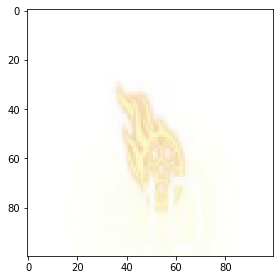

In [3]:
# Another Example
img2 =imread('Train/Shots on Goal/batch_01_frame79.jpg')
# Resize and Crop the Image
test_2 = resize(img2, output_shape=(700,700))[80:180, 300:400]
imshow(test_2)

In [4]:
# Creating Data Frame with the mapping of the features
labels = os.listdir('Train') 

image_id_column = []
for folder_name in labels:
    image_id_column = image_id_column + os.listdir(f'Train/{folder_name}')

class_column = []
for folder_name in labels:
    folder = os.listdir(f'Train/{folder_name}')
    for image_id in folder:
        class_column.append(folder_name)
        
training_map = pd.DataFrame([image_id_column, class_column]).transpose()
training_map.columns = ['Image_ID', 'Classification']
training_map

,Image_ID,Classification
0,batch_01_frame188.jpg,Aerial Goals
1,batch_01_frame189.jpg,Aerial Goals
2,batch_01_frame190.jpg,Aerial Goals
3,batch_01_frame290.jpg,Aerial Goals
4,batch_01_frame291.jpg,Aerial Goals
...,...,...
1143,batch_43_1368_frame.jpg,Wins
1144,batch_43_1369_frame.jpg,Wins
1145,batch_43_1370_frame.jpg,Wins
1146,batch_44_399_frame.jpg,Wins


In [5]:
# Converting images into pixels
X = [] 

for folder in labels:
    images_by_folder = os.listdir(f'Train/{folder}')
    for image_id in images_by_folder:
        img = plt.imread(f'Train/{folder}/' + image_id)
        X.append(img)

X = np.array(X)  # Entire array of images for training/validation.

In [6]:
X.shape

(1148, 720, 1280, 3)

In [7]:
# Converting classes to a dummified version
Y = training_map['Classification']
Y = pd.get_dummies(Y)
Y.head()

,Aerial Goals,Assists,Backwards Goals,Center Balls,Clear Balls,Demolitions,Epic Saves,First Touches,Goals,Hat Tricks,Long Goals,Low Fives,MVPs,Playmaker,Saves,Saviors,Shots on Goal,Turtle Goals,Unlabeled,Wins
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Resizes images and crops them for Keras Model
image = []
for i in range(0, X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(700,700))[80:180, 300:400].astype(int) # Crop shape: 100 by 100
    image.append(a)

X = np.array(image)


In [9]:
print(X)
print(X.shape)

[[[[ 45  54  58]
   [ 45  53  58]
   [ 42  51  56]
   ...
   [ 39  48  55]
   [ 36  45  52]
   [ 37  46  53]]

  [[ 44  52  55]
   [ 42  49  54]
   [ 40  49  54]
   ...
   [ 40  49  56]
   [ 35  44  51]
   [ 36  45  52]]

  [[ 43  51  54]
   [ 40  48  51]
   [ 42  49  55]
   ...
   [ 40  49  56]
   [ 37  46  53]
   [ 36  45  52]]

  ...

  [[ 36  41  45]
   [ 40  45  49]
   [ 38  43  47]
   ...
   [211 204 167]
   [183 175 136]
   [168 159 121]]

  [[ 41  46  50]
   [ 39  44  48]
   [ 38  43  47]
   ...
   [135 129  95]
   [126 119  84]
   [123 112  81]]

  [[ 39  44  48]
   [ 38  43  47]
   [ 35  40  44]
   ...
   [109 102  77]
   [103  96  72]
   [ 97  89  67]]]


 [[[ 68  79  83]
   [ 75  85  85]
   [ 80  90  87]
   ...
   [133 122 106]
   [122 114  97]
   [115 109  93]]

  [[ 65  77  81]
   [ 75  85  84]
   [ 80  90  86]
   ...
   [129 118 101]
   [121 112  95]
   [117 110  94]]

  [[ 65  77  81]
   [ 74  84  83]
   [ 80  89  86]
   ...
   [129 117 101]
   [119 111  94]
   [112 105

In [10]:
# Prepares to push into base model
X = preprocess_input(X)

In [11]:
print(X.shape)
print(X)

(1148, 100, 100, 3)
[[[[ -45.939003    -62.779       -78.68      ]
   [ -45.939003    -63.779       -78.68      ]
   [ -47.939003    -65.779       -81.68      ]
   ...
   [ -48.939003    -68.779       -84.68      ]
   [ -51.939003    -71.779       -87.68      ]
   [ -50.939003    -70.779       -86.68      ]]

  [[ -48.939003    -64.779       -79.68      ]
   [ -49.939003    -67.779       -81.68      ]
   [ -49.939003    -67.779       -83.68      ]
   ...
   [ -47.939003    -67.779       -83.68      ]
   [ -52.939003    -72.779       -88.68      ]
   [ -51.939003    -71.779       -87.68      ]]

  [[ -49.939003    -65.779       -80.68      ]
   [ -52.939003    -68.779       -83.68      ]
   [ -48.939003    -67.779       -81.68      ]
   ...
   [ -47.939003    -67.779       -83.68      ]
   [ -50.939003    -70.779       -86.68      ]
   [ -51.939003    -71.779       -87.68      ]]

  ...

  [[ -58.939003    -75.779       -87.68      ]
   [ -54.939003    -71.779       -83.68      ]
   [ -

In [12]:
# Splitting data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [13]:
# Initializes Base model with Imagenet, does not include the top layer of imagenet (parameters)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

In [14]:
X_train = base_model.predict(X_train)

In [15]:
X_test = base_model.predict(X_test)

In [16]:
print(X_train.shape)
print(X_test.shape)

(918, 3, 3, 512)
(230, 3, 3, 512)


In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*512)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]*512)

In [18]:
print(X_train.shape)
print(X_test.shape)

(918, 4608)
(230, 4608)


In [19]:
train = X_train/X_train.max()
X_test = X_test/X_train.max()

In [20]:
model = Sequential()
model.add(InputLayer((3*3*512)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2359808   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                2

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# computing weights of different classes
class_weights = compute_class_weight(class_weight='balanced', 
                     classes=training_map['Classification'].unique(), 
                     y=training_map['Classification'])
print(class_weights)
print(training_map['Classification'].unique())

[ 3.02105263  0.74545455 19.13333333  0.35875     0.5266055   0.65227273
  2.296       0.54666667  0.49482759  2.20769231  3.18888889 14.35
  6.37777778 14.35        0.7175      4.1         0.48235294 28.7
  0.56831683  0.83188406]
['Aerial Goals' 'Assists' 'Backwards Goals' 'Center Balls' 'Clear Balls'
 'Demolitions' 'Epic Saves' 'First Touches' 'Goals' 'Hat Tricks'
 'Long Goals' 'Low Fives' 'MVPs' 'Playmaker' 'Saves' 'Saviors'
 'Shots on Goal' 'Turtle Goals' 'Unlabeled' 'Wins']


In [24]:
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]      # model check pointing based on validation loss

In [25]:
model.fit(train, Y_train, epochs=25, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Epoch 1/25
25/29 [========================>.....] - ETA: 0s - loss: 2.8292 - accuracy: 0.1063
Epoch 00001: val_loss improved from inf to 2.56241, saving model to weights.best.hdf5
29/29 [==============================] - 1s 18ms/step - loss: 2.8085 - accuracy: 0.1144 - val_loss: 2.5624 - val_accuracy: 0.1304
Epoch 2/25
25/29 [========================>.....] - ETA: 0s - loss: 2.4681 - accuracy: 0.2212
Epoch 00002: val_loss improved from 2.56241 to 2.07788, saving model to weights.best.hdf5
29/29 [==============================] - 0s 11ms/step - loss: 2.4554 - accuracy: 0.2255 - val_loss: 2.0779 - val_accuracy: 0.5000
Epoch 3/25
25/29 [========================>.....] - ETA: 0s - loss: 1.9376 - accuracy: 0.4137
Epoch 00003: val_loss improved from 2.07788 to 1.41505, saving model to weights.best.hdf5
29/29 [==============================] - 0s 11ms/step - loss: 1.9152 - accuracy: 0.4227 - val_loss: 1.4150 - val_accuracy: 0.6391
Epoch 4/25
25/29 [========================>.....] - ETA: 0s - 

In [26]:
# Test map preparation
determinant = pd.read_csv('Determinant/Determinant Map.csv')

determinant_image = []
determinant['Image_ID']
for img_name in determinant['Image_ID']:
    img = plt.imread(f'Determinant/{img_name}')
    determinant_image.append(img)

determinant_images = np.array(determinant_image)

determinant_image = []
for i in range(0,determinant_images.shape[0]):
    a = resize(determinant_images[i], preserve_range=True, output_shape=(700,700))[80:180, 300:400].astype(int)
    determinant_image.append(a)
determinant_image = np.array(determinant_image)


determinant_image = preprocess_input(determinant_image)

# extracting features from the images using pretrained model
determinant_image = base_model.predict(determinant_image)

# converting the images to 1-D form
determinant_image = determinant_image.reshape(determinant_image.shape[0],
                                              determinant_image.shape[1]*determinant_image.shape[2]*512)

# zero centered images
determinant_image = determinant_image/determinant_image.max()

In [27]:
# Feed into prediction:
determinant_outcome = determinant.drop(columns='Image_ID')
determinant_outcome

,Aerial Goals,Assists,Backwards Goals,Center Balls,Clear Balls,Demolitions,Epic Saves,First Touches,Goals,Hat Tricks,Long Goals,Low Fives,MVPs,Playmaker,Saves,Saviors,Shots on Goal,Turtle Goals,Unlabeled,Wins
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
582,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
model.load_weights("weights.best.hdf5")

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
# Calculates the accuracy of the video given the test video (with unlabeled frames)
scores= model.evaluate(determinant_image, determinant_outcome)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

19/19 [==============================] - 0s 2ms/step - loss: 0.9291 - accuracy: 0.8017
accuracy: 80.17%


In [49]:
# The Labeling process of what the computer thinks each frame is.
prediction = np.argmax(model.predict(determinant_image), axis=-1)

print(determinant_outcome.columns[prediction]) # Finds the rows given the prediction value (same as row)
print(prediction)
determinant_outcome.columns # You can use this to compare the count.

Index(['First Touches', 'Goals', 'Unlabeled', 'Goals', 'Unlabeled', 'Goals',
       'Goals', 'Unlabeled', 'Unlabeled', 'Goals',
       ...
       'Unlabeled', 'Unlabeled', 'Unlabeled', 'Unlabeled', 'Unlabeled', 'Wins',
       'Wins', 'Unlabeled', 'MVPs', 'MVPs'],
      dtype='object', length=585)
[ 7  8 18  8 18  8  8 18 18  8 18  8 18  8 18  8  8  8 18  8 18  8 18 18
  7  8 18  8  8 18 18  8 18  8 18 18  8  8 18 18  8 18 18  8 18  8 18  8
 18  8 18  8 18  1 18  8 18  8 18 18 18  8 18  8 18 18 18 18  7  8 18 18
 18  8 18 18  7  8  7  8 18  8 18  8  8  8 18 18 18  8 18  8  8  8 18  8
 18  8 18  8 18 18 18  8 18 18  7 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 19 19 14 18 18 18 18 19 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18  8 18 18 18 18 18 18 18 18 18 18 18  8 18 18 18 18 18 18 18
 18  8  8  8 18 18 18 18 18 18 18 18  8  8 18 18 18 18  8  8  5  7 18 18
  7 18  3 18 18 18 18 18 18 18 18 18 18 14 19 18  1 16 16  8  8  3 18 18
  3 18 18 18 18 18 18 18 18 18 18 19 18 18 18

Index(['Aerial Goals', 'Assists', 'Backwards Goals', 'Center Balls',
       'Clear Balls', 'Demolitions', 'Epic Saves', 'First Touches', 'Goals',
       'Hat Tricks', 'Long Goals', 'Low Fives', 'MVPs', 'Playmaker', 'Saves',
       'Saviors', 'Shots on Goal', 'Turtle Goals', 'Unlabeled', 'Wins'],
      dtype='object')

In [43]:
new_prediction = prediction.tolist()
print('Goal Image Count:', new_prediction.count(12))
print(new_prediction)

Goal Image Count: 2
[7, 8, 18, 8, 18, 8, 8, 18, 18, 8, 18, 8, 18, 8, 18, 8, 8, 8, 18, 8, 18, 8, 18, 18, 7, 8, 18, 8, 8, 18, 18, 8, 18, 8, 18, 18, 8, 8, 18, 18, 8, 18, 18, 8, 18, 8, 18, 8, 18, 8, 18, 8, 18, 1, 18, 8, 18, 8, 18, 18, 18, 8, 18, 8, 18, 18, 18, 18, 7, 8, 18, 18, 18, 8, 18, 18, 7, 8, 7, 8, 18, 8, 18, 8, 8, 8, 18, 18, 18, 8, 18, 8, 8, 8, 18, 8, 18, 8, 18, 8, 18, 18, 18, 8, 18, 18, 7, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 14, 18, 18, 18, 18, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 8, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 8, 18, 18, 18, 18, 18, 18, 18, 18, 8, 8, 8, 18, 18, 18, 18, 18, 18, 18, 18, 8, 8, 18, 18, 18, 18, 8, 8, 5, 7, 18, 18, 7, 18, 3, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 14, 19, 18, 1, 16, 16, 8, 8, 3, 18, 18, 3, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 18, 18, 18, 18, 18, 18, 18, 8, 18, 18, 18, 18, 16, 16, 10, 18, 18, 18, 16, 8, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,

In [53]:
# Calculating the true Accuracy Given a video.
result = filter(lambda x: x % 18 != 0, new_prediction) 

results = []

for classes in result:
    results.append(determinant_outcome.columns[classes])
    print(classes)


modified_results = {}
for names in determinant_outcome.drop(columns='Unlabeled').columns:
    modified_results[names] = results.count(names)

for value, name in zip(modified_results.items(), modified_results.keys()):
    modified_results[name] = [math.ceil(value[1]/3)]
    if name == 'Wins':
        modified_results[name] = [1]


computer_results = pd.DataFrame.from_dict(modified_results)
true_dict = {'Aerial Goals': [0],
                'Assists': [0],
                'Backwards Goals': [0],
                'Center Balls': [2],
                'Clear Balls': [2],
                'Demolitions': [0],
                'Epic Saves': [0],
                'First Touches': [1],
                'Goals': [2],
                'Hat Tricks': [0],
                'Long Goals': [0],
                'Low Fives': [0],
                'MVPs': [0],
                'Playmaker': [0],
                'Saves': [0],
                'Saviors': [0],
                'Shots on Goal': [3],
                'Turtle Goals': [0],
                'Wins': [1]
               }
true_results = pd.DataFrame.from_dict(true_dict)

7
8
8
8
8
8
8
8
8
8
8
8
8
7
8
8
8
8
8
8
8
8
8
8
8
8
8
1
8
8
8
8
7
8
8
7
8
7
8
8
8
8
8
8
8
8
8
8
8
8
8
7
19
19
14
19
8
8
8
8
8
8
8
8
8
5
7
7
3
14
19
1
16
16
8
8
3
3
19
8
16
16
10
16
8
8
8
8
8
5
7
8
5
7
19
3
3
9
4
4
19
3
3
7
19
8
7
3
8
7
5
8
7
16
16
5
8
8
7
7
7
7
4
4
7
8
8
19
14
14
8
14
19
19
12
12


In [51]:
computer_results

,Aerial Goals,Assists,Backwards Goals,Center Balls,Clear Balls,Demolitions,Epic Saves,First Touches,Goals,Hat Tricks,Long Goals,Low Fives,MVPs,Playmaker,Saves,Saviors,Shots on Goal,Turtle Goals,Wins
0,1,0,3,2,2,0,7,24,1,1,0,1,0,2,0,3,0,0,1


In [54]:
true_results

,Aerial Goals,Assists,Backwards Goals,Center Balls,Clear Balls,Demolitions,Epic Saves,First Touches,Goals,Hat Tricks,Long Goals,Low Fives,MVPs,Playmaker,Saves,Saviors,Shots on Goal,Turtle Goals,Wins
0,0,0,0,2,2,0,0,1,2,0,0,0,0,0,0,0,3,0,1


In [36]:
a = computer_results.values.sum()
b = true_results.values.sum()

print('True Accuaracy Rate:', b/(a+b))

True Accuaracy Rate: 0.1864406779661017
